In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
help(mh.runners)

Help on package mlrose_hiive.runners in mlrose_hiive:

NAME
    mlrose_hiive.runners - Classes for running optimization problems.

PACKAGE CONTENTS
    _nn_runner_base
    _runner_base
    ga_border_check_front_runner
    ga_border_check_runner
    ga_js_border_check_simple_runner
    ga_js_runner
    ga_runner
    mimic_runner
    nngs_runner
    rhc_runner
    sa_runner
    skmlp_runner
    utils

FILE
    /Users/qingchuanlyu/anaconda3/envs/cs7641/lib/python3.10/site-packages/mlrose_hiive/runners/__init__.py




In [4]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [5]:
import pandas as pd
import importlib
import utility as u

In [6]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [7]:
size = 10
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [8]:
"""
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open(f"{size}_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [9]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [10]:
problem_ffp.length

10

In [11]:
problem_ffp.fitness

114.0

In [12]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [13]:
df_run_curves_ffp.shape

(3534, 7)

In [14]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005780,88.0,0.0,40,0.07,2048
1,1,0.022781,140.0,2.0,40,0.07,2048
2,2,0.035747,150.0,4.0,40,0.07,2048
3,3,0.043877,153.0,6.0,40,0.07,2048
4,4,0.053390,171.0,8.0,40,0.07,2048


In [15]:
df_run_curves_ffp['Fitness'].max()

230.0

In [16]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
68,68,0.616559,230.0,83.0,40,0.07,2048
69,69,0.634278,230.0,84.0,40,0.07,2048
70,70,0.688469,230.0,85.0,40,0.07,2048
71,71,0.718970,230.0,86.0,40,0.07,2048
72,72,0.744867,230.0,87.0,40,0.07,2048
...,...,...,...,...,...,...,...
3529,557,4.178459,230.0,575.0,60,0.08,2048
3530,558,4.185346,230.0,576.0,60,0.08,2048
3531,559,4.189661,230.0,577.0,60,0.08,2048
3532,560,4.193119,230.0,578.0,60,0.08,2048


In [17]:
# need to check Time and FEvals

In [18]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [19]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
68,68,0.616559,230.0,83.0,40,0.07,2048
69,69,0.634278,230.0,84.0,40,0.07,2048
70,70,0.688469,230.0,85.0,40,0.07,2048
71,71,0.718970,230.0,86.0,40,0.07,2048
72,72,0.744867,230.0,87.0,40,0.07,2048
...,...,...,...,...,...,...,...
3529,557,4.178459,230.0,575.0,60,0.08,2048
3530,558,4.185346,230.0,576.0,60,0.08,2048
3531,559,4.189661,230.0,577.0,60,0.08,2048
3532,560,4.193119,230.0,578.0,60,0.08,2048


In [20]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,40,0.07,83.0,318.0,0.616559
1,40,0.08,93.0,325.0,0.000715
2,50,0.07,81.0,317.0,0.607737
3,50,0.08,151.0,384.0,0.000715
4,60,0.07,142.0,373.0,0.000715
5,60,0.08,79.0,311.0,0.539015


In [43]:
# tentatively, pick pop size = 60 and mutation_rate = 0.08

In [21]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005780,88.0,0.0,40,0.07,2048
1,1,0.022781,140.0,2.0,40,0.07,2048
2,2,0.035747,150.0,4.0,40,0.07,2048
3,3,0.043877,153.0,6.0,40,0.07,2048
4,4,0.053390,171.0,8.0,40,0.07,2048


In [23]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [25]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [26]:
df_iter_curves_ffp.shape

(6042, 7)

In [27]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002447,88.0,0.0,60,0.08,2048
1,1,0.034461,135.0,2.0,60,0.08,2048
2,2,0.048751,144.0,4.0,60,0.08,2048
3,3,0.063425,162.0,6.0,60,0.08,2048
4,4,0.077025,173.0,8.0,60,0.08,2048


In [28]:
df_iter_curves_ffp.Fitness.max()

230.0

In [29]:
size

10

In [30]:
df_iter_curves_ffp.to_csv(f'../../csv-files/ga_js_{size}.csv')

In [31]:
"""
import pandas as pd
import numpy as np
size = 10
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')
"""

"\nimport pandas as pd\nimport numpy as np\nsize = 10\ndf_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')\n"

In [32]:
df_iter_curves_ffp.Iteration.max()

683

In [33]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [34]:
df_fitness_iter_ffp.shape

(684, 3)

In [35]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,104.2,808.622222
1,1,142.7,16.011111
2,2,151.4,35.822222
3,3,160.5,83.388889
4,4,169.4,92.044444


In [36]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

61      61
62      62
63      63
64      64
65      65
      ... 
617    617
618    618
619    619
620    620
621    621
Name: Iteration, Length: 5010, dtype: int64

In [37]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

183

In [38]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [39]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [40]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,104.2,808.622222,28.436284
1,1,142.7,16.011111,4.001389
2,2,151.4,35.822222,5.985167
3,3,160.5,83.388889,9.131752
4,4,169.4,92.044444,9.593980


Text(0, 0.5, 'Fitness')

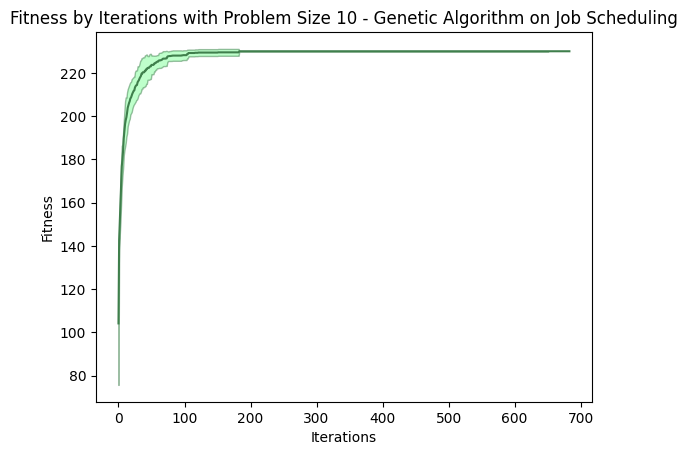

In [41]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [42]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    230.0
Name: avg_fitness, dtype: float64

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [45]:
df_fitness_iter_ffp.stddev_fitness.max()

28.43628355151605

In [46]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

10.532489417670133

In [47]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [48]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

10    10
Name: Iteration, dtype: int64

In [49]:
# Fevals - iteration

In [50]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [51]:
df_FEvals_iter_ffp.shape

(684, 3)

In [52]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.8,0.177778
3,3,5.6,0.266667
4,4,7.4,0.488889


In [53]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [54]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
183,183,202.3,8.677778,2.945807


In [55]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 3.0184617127124693)

In [56]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.8,0.177778,0.421637
3,3,5.6,0.266667,0.516398
4,4,7.4,0.488889,0.699206


Text(0, 0.5, 'FEvals')

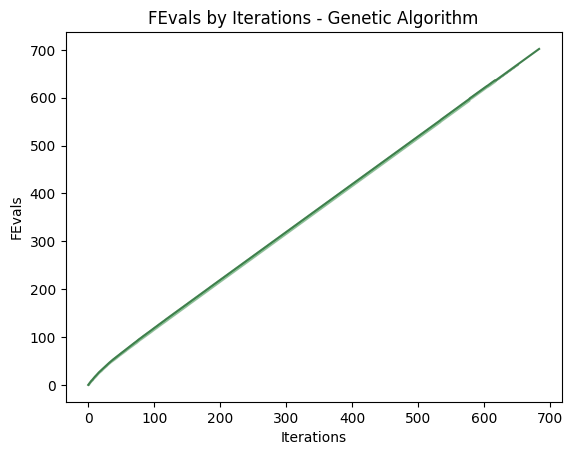

In [57]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [58]:
# fitness - wall clock time

In [59]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [60]:
df_time_iter_ffp.shape

(684, 3)

In [61]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001243,5.634019e-07
1,1,0.011649,7.967365e-05
2,2,0.019472,1.457462e-04
3,3,0.028196,2.422492e-04
4,4,0.034253,3.252311e-04


In [62]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [63]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001243,5.634019e-07,0.000751
1,1,0.011649,7.967365e-05,0.008926
2,2,0.019472,1.457462e-04,0.012073
3,3,0.028196,2.422492e-04,0.015564
4,4,0.034253,3.252311e-04,0.018034


Text(0, 0.5, 'Time')

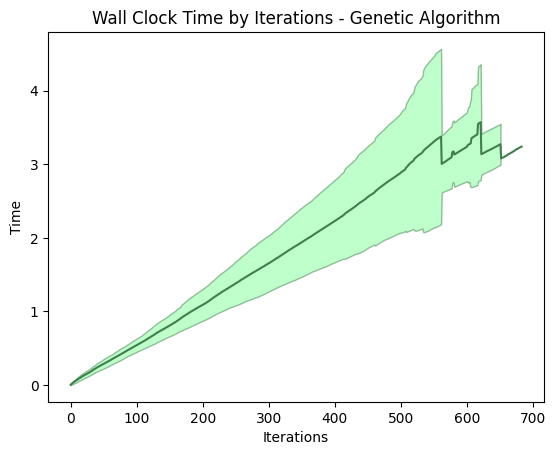

In [64]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [65]:
df_time_iter_ffp.stddev_time.max()

1.1915310274487845

In [66]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,2.893963,0.676843,0.822705


In [67]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
183,183,1.001705,0.039636,0.199089


In [68]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

561    561
Name: Iteration, dtype: int64

In [69]:
# maybe look at how std dev decrease in bulks